In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import os
# Get the directory of the current notebook
current_dir = os.path.dirname(os.path.abspath('../scripts')) 

# Add the 'scripts' directory to the Python path
scripts_dir = os.path.join(current_dir, 'scripts')
sys.path.append(scripts_dir)

In [3]:
fraud_data = pd.read_csv(r'C:\Users\Maintenant prêt\Desktop\PROJECTS\Fraud_Detection\data\Fraud_Data.csv')
                         

In [4]:
fraud_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [5]:
fraud_data.shape

(151112, 11)

In [6]:
fraud_data.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [7]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [8]:
# convert data types
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])
fraud_data['purchase_value'] = pd.to_datetime(fraud_data['purchase_value'])
fraud_data['source'] = fraud_data['source'].astype('category')
fraud_data['browser'] = fraud_data['browser'].astype('category')
fraud_data['sex'] = fraud_data['sex'].astype('category')
# convert ip_address to int64
fraud_data['ip_address'] = fraud_data['ip_address'].astype('int64')

In [9]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  object        
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  datetime64[ns]
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  category      
 6   browser         151112 non-null  category      
 7   sex             151112 non-null  category      
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  int64         
 10  class           151112 non-null  int64         
dtypes: category(3), datetime64[ns](2), int64(4), object(2)
memory usage: 9.7+ MB


# Univariate analysis

In [14]:
from data_processing import univariate_analysis

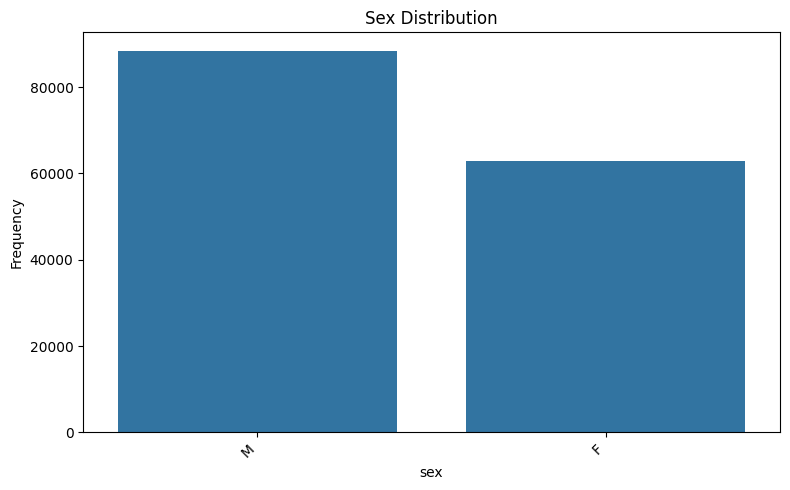

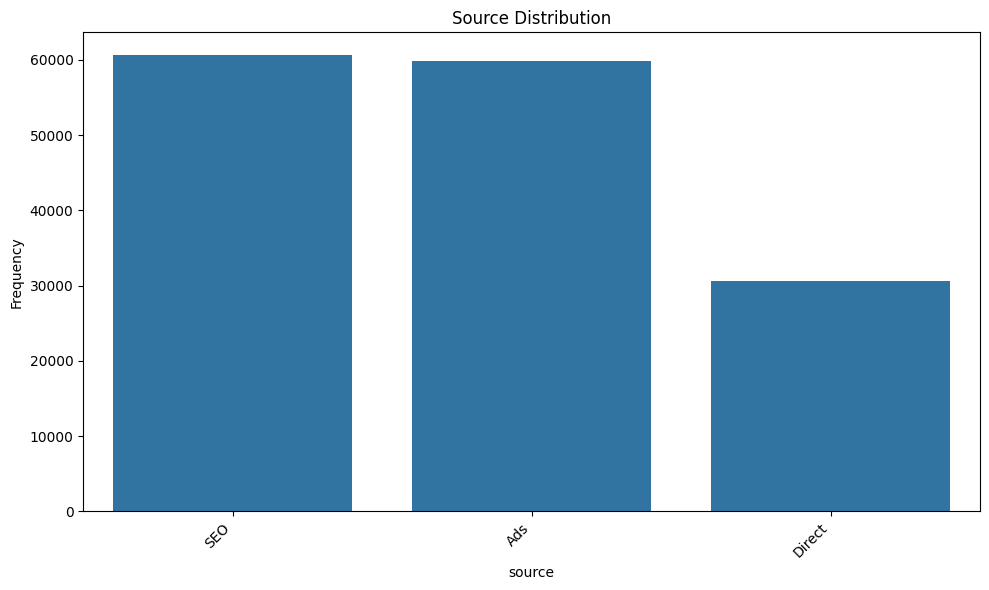

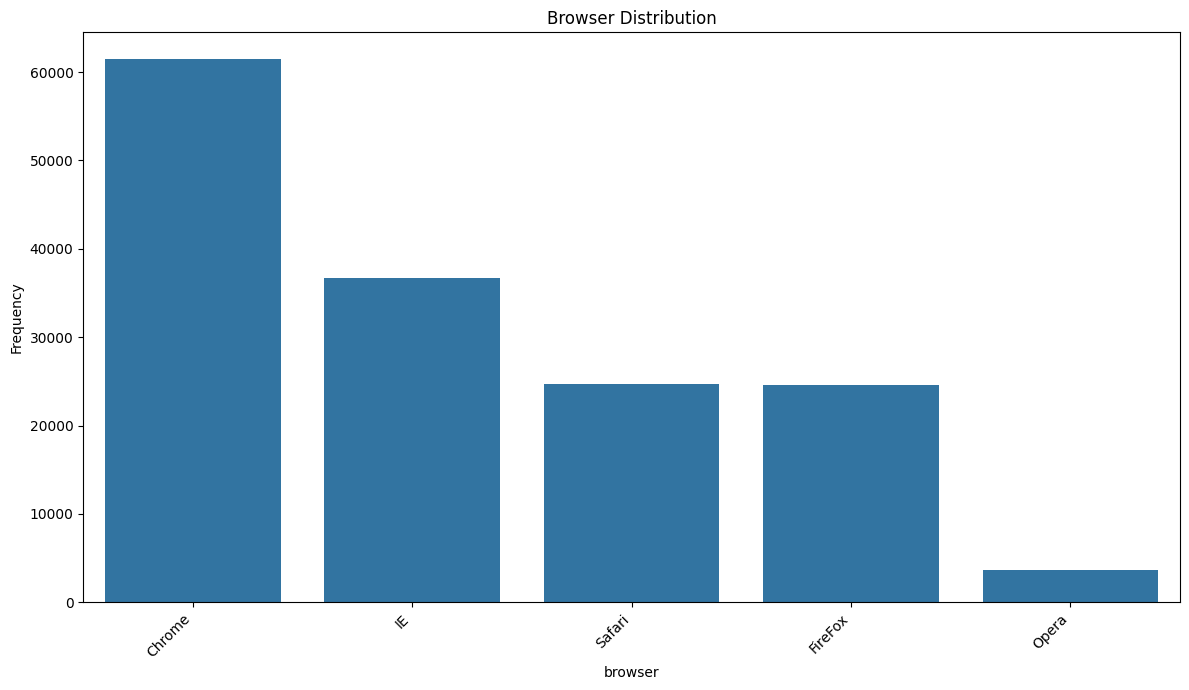

2025-02-07 17:36:30,141 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-07 17:36:30,211 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


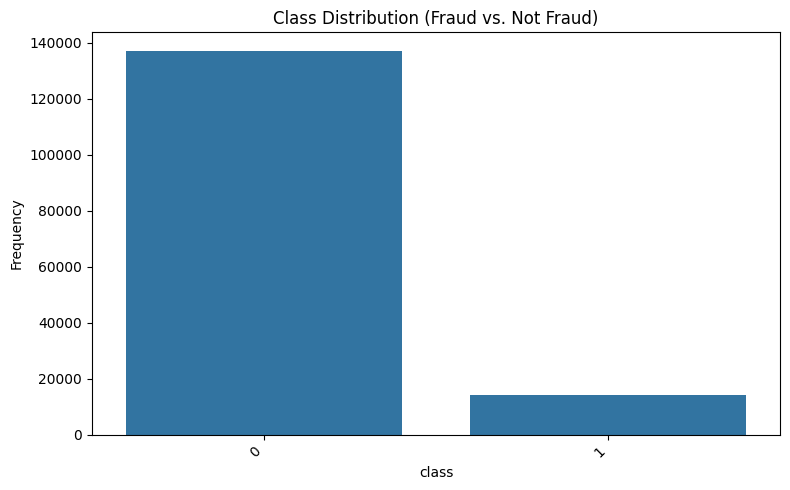

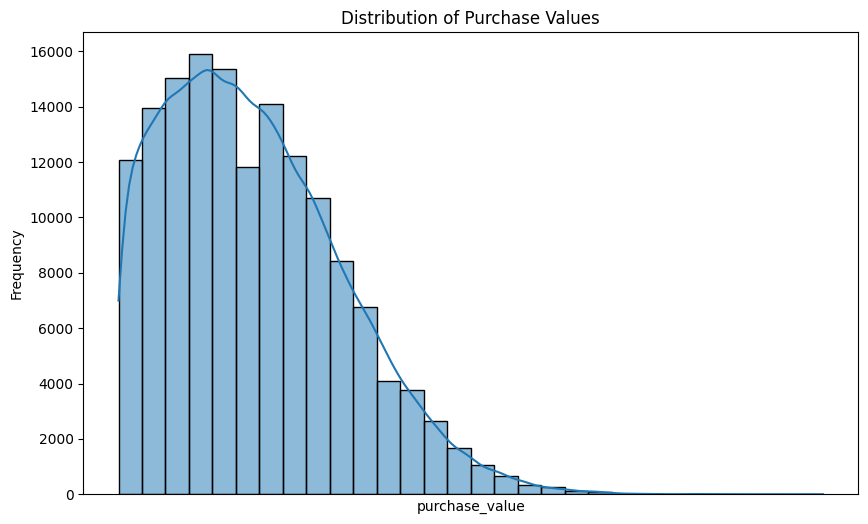

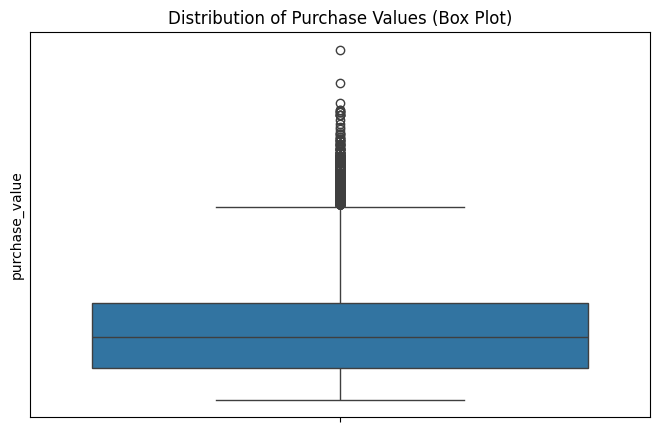

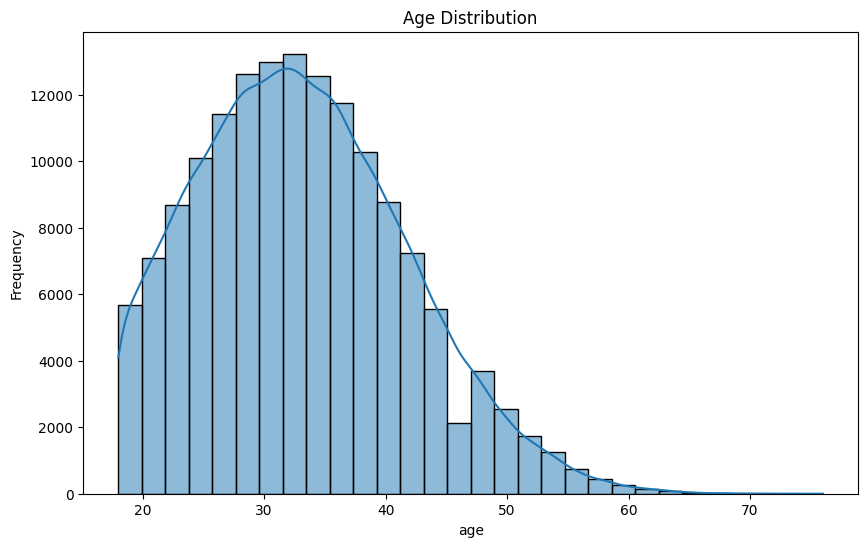

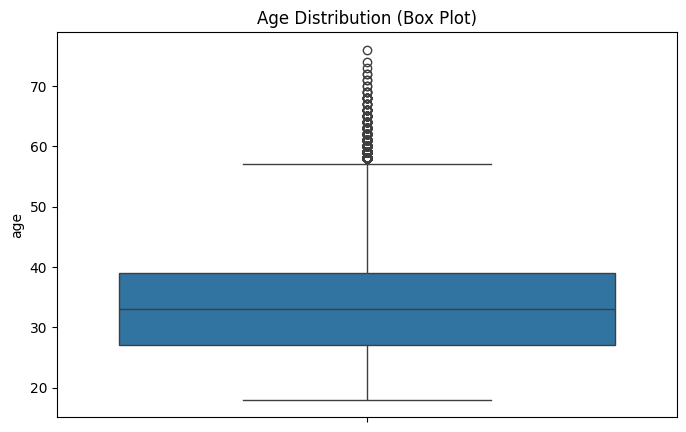

In [17]:
univariate_analysis(fraud_data)

# Bivariate Analysis

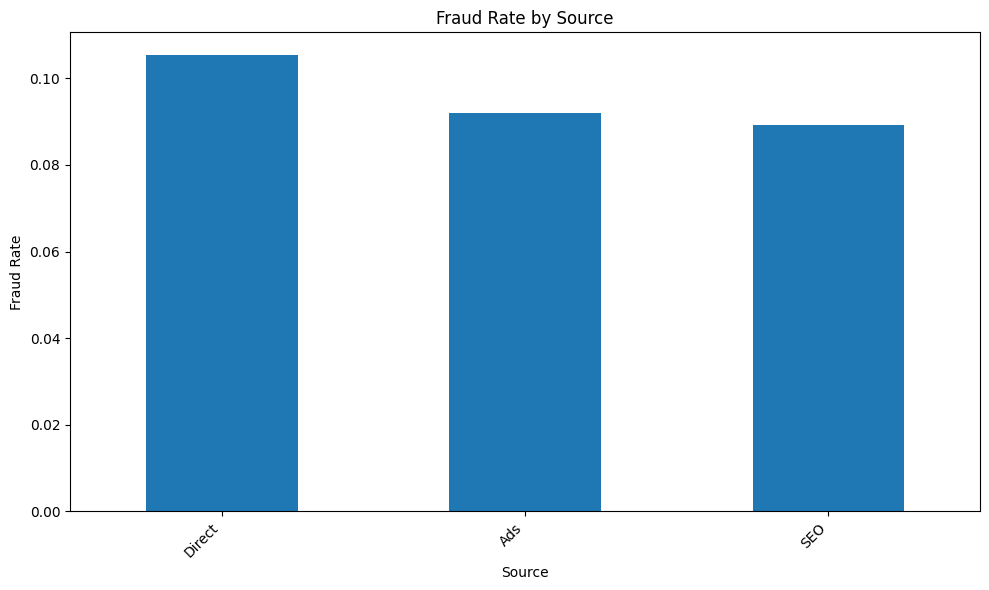

In [18]:
# Source vs. Fraud Rate 
source_fraud = fraud_data.groupby('source')['class'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
source_fraud.plot(kind='bar')
plt.title('Fraud Rate by Source')
plt.xlabel('Source')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

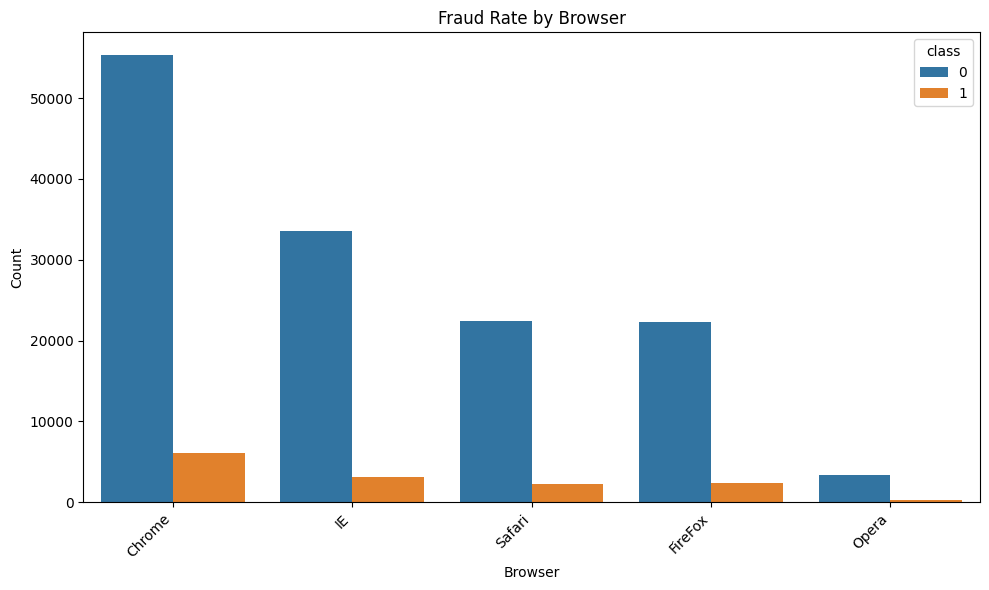

In [19]:
#  Fraud Rate by Browser
plt.figure(figsize=(10, 6))
sns.countplot(x='browser', hue='class', data=fraud_data, order=fraud_data['browser'].value_counts().index[:10]) # Show top 10
plt.title('Fraud Rate by Browser')
plt.xlabel('Browser')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


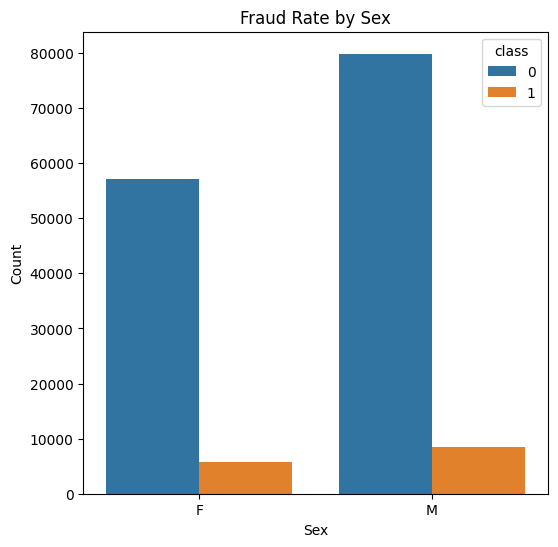

In [20]:
# Fraud Rate by Sex
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', hue='class', data=fraud_data)
plt.title('Fraud Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

2025-02-07 17:50:09,230 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-07 17:50:09,322 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


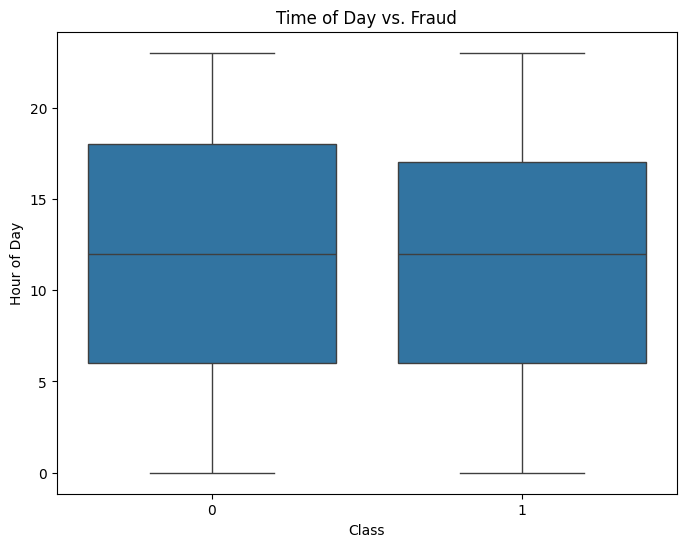

In [21]:
#  Time of Day vs. Fraud
# Extract hour of day
fraud_data['purchase_hour'] = fraud_data['purchase_time'].dt.hour

plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='purchase_hour', data=fraud_data)  # Or use violinplot
# sns.violinplot(x='class', y='purchase_hour', data=fraud_data) # Alternative
plt.title('Time of Day vs. Fraud')
plt.xlabel('Class')
plt.ylabel('Hour of Day')
plt.show()

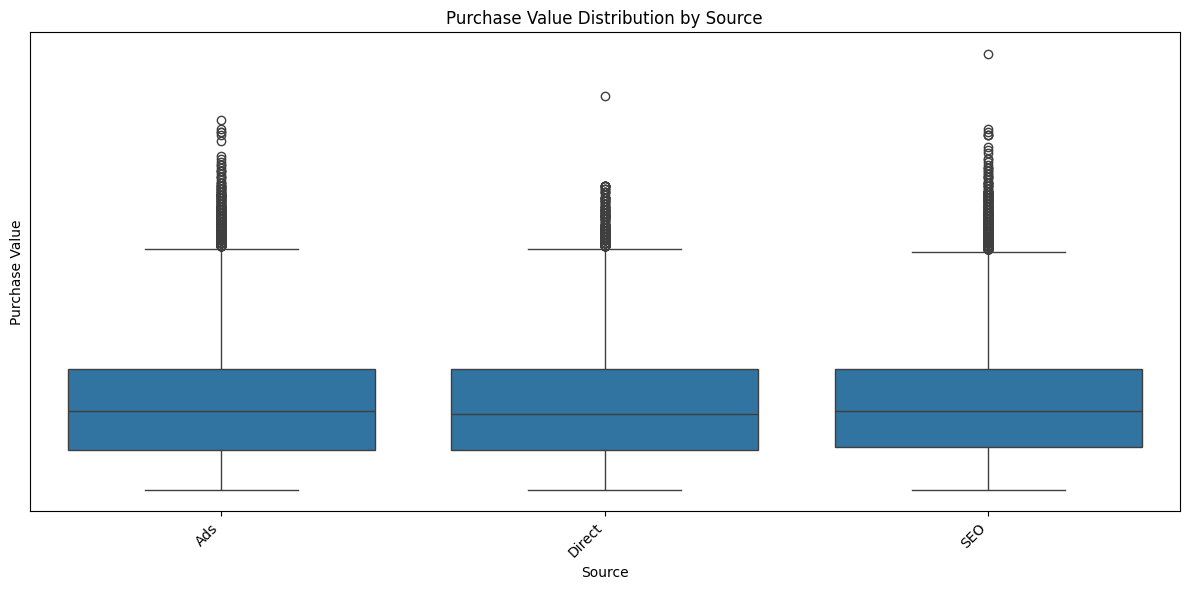

In [22]:
# Source vs. Purchase Value (Boxplot)
plt.figure(figsize=(12, 6))  # Adjust figure size for readability
sns.boxplot(x='source', y='purchase_value', data=fraud_data)
plt.title('Purchase Value Distribution by Source')
plt.xlabel('Source')
plt.ylabel('Purchase Value')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

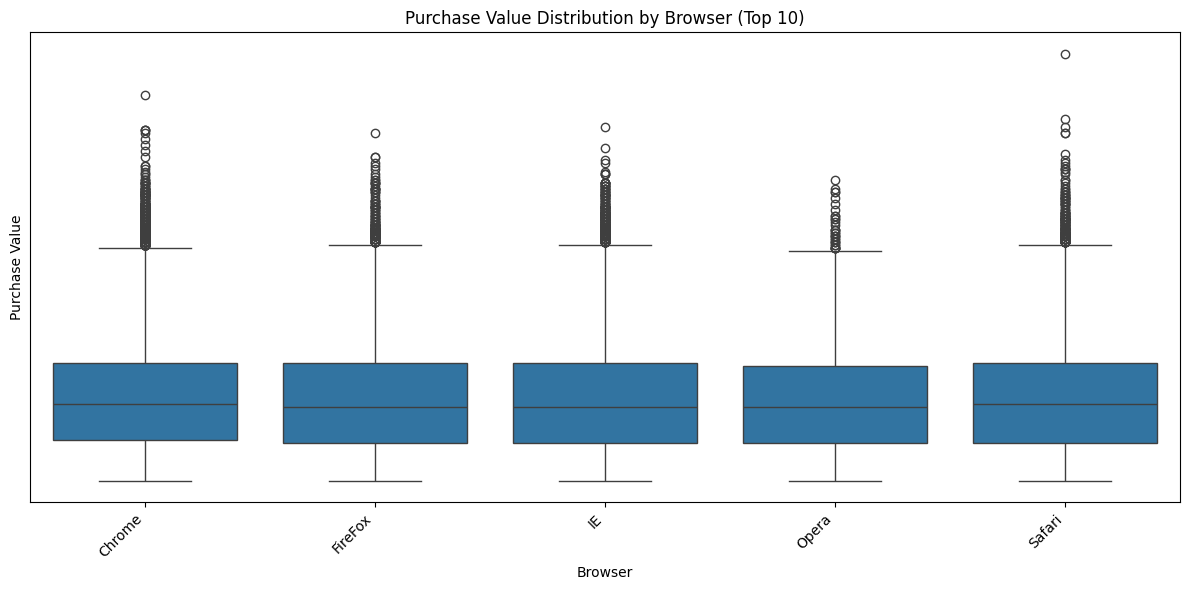

In [23]:
# Browser vs. Purchase Value 
top_browsers = fraud_data['browser'].value_counts().nlargest(10).index  
plt.figure(figsize=(12, 6))
sns.boxplot(x='browser', y='purchase_value', data=fraud_data[fraud_data['browser'].isin(top_browsers)]) 
plt.title('Purchase Value Distribution by Browser (Top 10)')
plt.xlabel('Browser')
plt.ylabel('Purchase Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

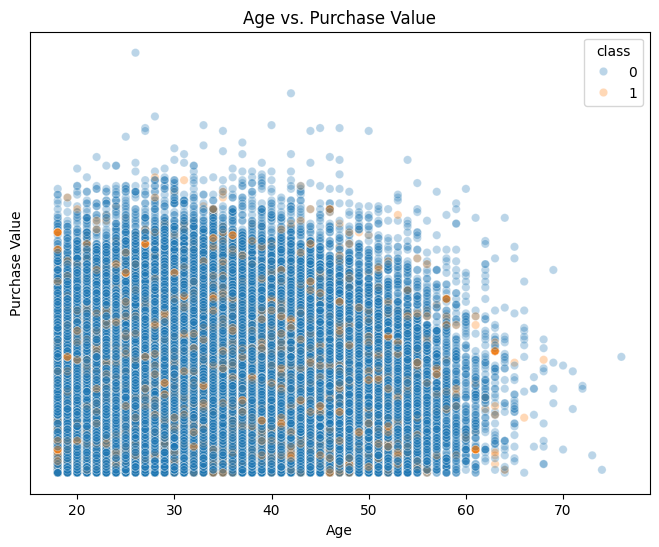

In [24]:
# Age vs. Purchase Value 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='purchase_value', data=fraud_data, hue='class', alpha=0.3) 
plt.title('Age vs. Purchase Value')
plt.xlabel('Age')
plt.ylabel('Purchase Value')
plt.show()

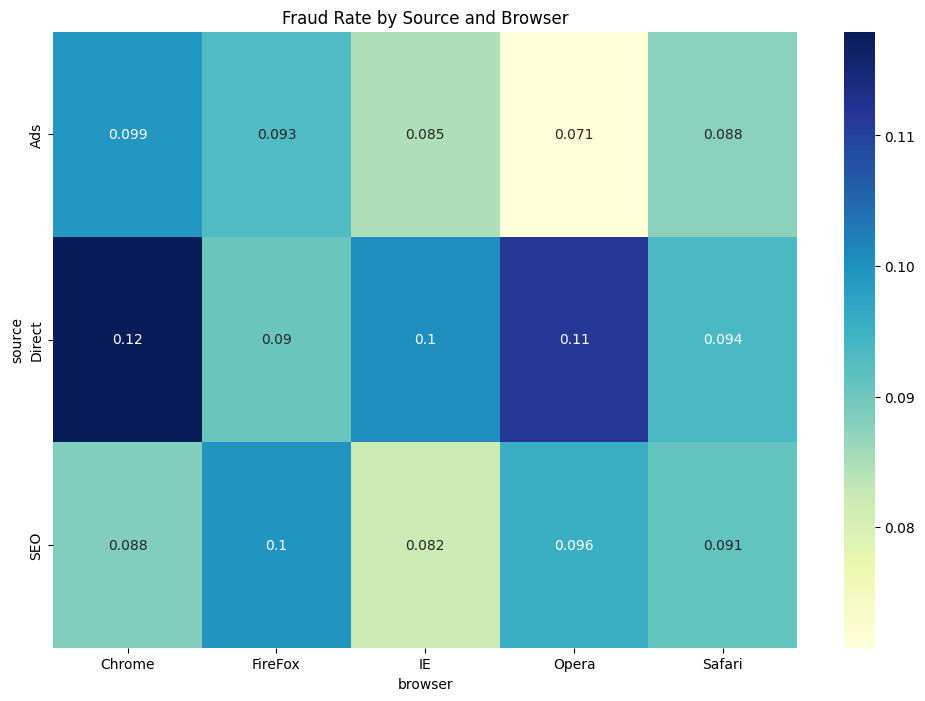

In [25]:
# fraud rate by source and browser
source_browser = fraud_data.groupby(['source', 'browser'])['class'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(source_browser, annot=True, cmap='YlGnBu')  # annot=True to display values
plt.title('Fraud Rate by Source and Browser')
plt.show()

In [26]:
ip_address_to_country = pd.read_csv(r"C:\Users\Maintenant prêt\Desktop\PROJECTS\Fraud_Detection\data\IpAddress_to_Country.csv")

In [27]:
ip_address_to_country

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [28]:
ip_address_to_country.shape

(138846, 3)

In [29]:
ip_address_to_country.describe()

,lower_bound_ip_address,upper_bound_ip_address
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [30]:
ip_address_to_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [36]:
ip_address_to_country['lower_bound_ip_address'] = ip_address_to_country['lower_bound_ip_address'].astype('int64') 

In [33]:
import ipaddress
fraud_data['ip_address_int'] = fraud_data['ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))

In [37]:
ip_sorted = ip_address_to_country.sort_values('lower_bound_ip_address')
fraud_sorted = fraud_data.sort_values('ip_address_int')
merged = pd.merge_asof(
    fraud_sorted, ip_sorted,
    left_on='ip_address_int', right_on='lower_bound_ip_address',
    direction='backward'
)
merged['country'] = merged.apply(
    lambda row: row['country'] if row['ip_address_int'] <= row['upper_bound_ip_address'] else None,
    axis=1
)

In [39]:
merged.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,purchase_hour,ip_address_int,lower_bound_ip_address,upper_bound_ip_address,country
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,1970-01-01 00:00:00.000000046,ZCLZTAJPCRAQX,Direct,Safari,M,36,52093,0,10,52093,NaN,NaN,None
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,1970-01-01 00:00:00.000000033,YFGYOALADBHLT,Ads,IE,F,30,93447,0,17,93447,NaN,NaN,None
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,1970-01-01 00:00:00.000000033,QZNVQTUITFTHH,Direct,FireFox,F,32,105818,0,8,105818,NaN,NaN,None
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,1970-01-01 00:00:00.000000033,PIBUQMBIELMMG,Ads,IE,M,40,117566,0,21,117566,NaN,NaN,None
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,1970-01-01 00:00:00.000000055,WFIIFCPIOGMHT,Ads,Safari,M,38,131423,0,7,131423,NaN,NaN,None
